In [0]:
# https://www.datacamp.com/courses/deep-learning-with-pytorch

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# ! pip3 install torch==1.0.0
# after installation, restart runtime

     |████████████████████████████████| 591.8MB 22kB/s 
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 1.0.0 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0


In [0]:
import torch
import torch.nn as nn
from torch.nn import ReLU as relu
from torch import optim
import torchvision
from torchvision import transforms
import torch.nn.functional as F

In [3]:
# recommended version: 1.0.0 
torch.__version__

'1.3.0+cu100'

**Course Description**

Neural networks have been at the forefront of Artificial Intelligence research during the last few years, and have provided solutions to many difficult problems like image classification, language translation or Alpha Go. PyTorch is one of the leading deep learning frameworks, being at the same time both powerful and easy to use. In this course you will use PyTorch to first learn about the basic concepts of neural networks, before building your first neural network to predict digits from MNIST dataset. You will then learn about convolutional neural networks, and use them to build much more powerful models which give more accurate results. You will evaluate the results and use different techniques to improve them. Following the course, you will be able to delve deeper into neural networks and start your career in this fascinating field.

## 1. Introduction to PyTorch

In this first chapter, we introduce basic concepts of neural networks and deep learning using PyTorch library.

#### Creating tensors in PyTorch

Random tensors are very important in neural networks. Parameters of the neural networks typically are initialized with random weights (random tensors).

In [0]:
# Import torch
import torch

# Create random tensor of size 3 by 3
your_first_tensor = torch.rand(3, 3)

# Calculate the shape of the tensor
tensor_size = your_first_tensor.shape

# Print the values of the tensor and its shape
print(your_first_tensor)
print(tensor_size)

tensor([[0.6489, 0.0575, 0.2118],
        [0.8573, 0.3518, 0.4979],
        [0.3728, 0.2969, 0.9229]])
torch.Size([3, 3])


#### Matrix multiplication

There are many important types of matrices which have their uses in neural networks. Some important matrices are matrices of ones (where each entry is set to 1) and the identity matrix (where the diagonal is set to 1 while all other values are 0). The identity matrix is very important in linear algebra: any matrix multiplied with identity matrix is simply the original matrix.

In [0]:
# Create a matrix of ones with shape 3 by 3
tensor_of_ones = torch.ones(3, 3)
tensor_of_ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [0]:
# Create an identity matrix with shape 3 by 3
identity_tensor = torch.eye(3)
identity_tensor

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [0]:
# Do a matrix mulitplication of tensor_of_ones with identity_tensor
matrices_multiplied = torch.matmul(tensor_of_ones, identity_tensor)
print(matrices_multiplied)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [0]:
# Do an element-wise multiplication of tensor_of_ones with identity_tensor
element_multiplication = tensor_of_ones * identity_tensor
print(element_multiplication)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


**Observation:**

`matrices_multiplied` is same as `tensor_of_ones` (because identity matrix is the neutral element in matrix multiplication, the product of any matrix multiplied with it gives the original matrix), while `element_multiplication` is same as `identity_tensor`.

#### Forward pass

Let's have something resembling more a neural network. The computational graph has been given below. 

You are going to initialize 3 large random tensors, and then do the operations as given in the computational graph. The final operation is the mean of the tensor, given by torch.mean(your_tensor).

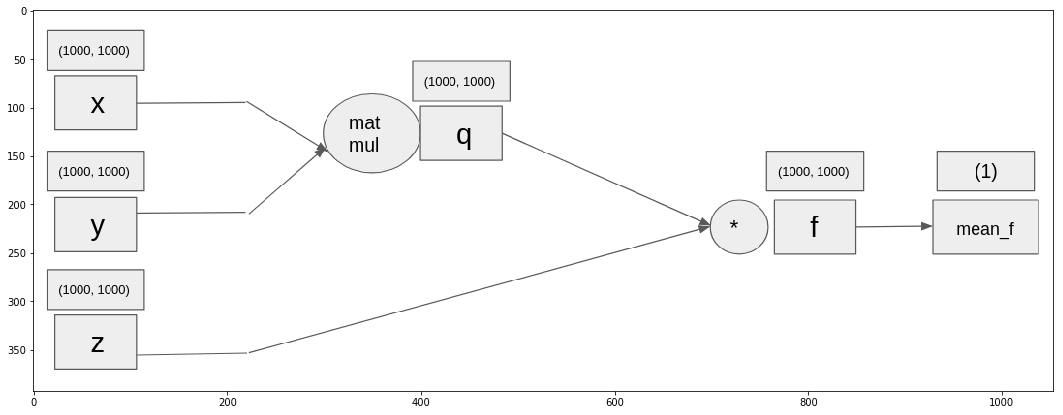

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('graph_exercise.jpg')
fig= plt.figure(figsize=(22,7))
plt.imshow(img)

In [0]:
# Initialize tensors x, y and z
x = torch.rand(1000, 1000)
y = torch.rand(1000, 1000)
z = torch.rand(1000, 1000)

In [0]:
# Multiply x with y
q = torch.matmul(x, y)

# Multiply elementwise z with q
f = z * q

mean_f = torch.mean(f)
print(mean_f)

tensor(125.0163)


#### Backpropagation using PyTorch

Here, you are going to use automatic differentiation of PyTorch in order to compute the derivatives of x, y and z from the previous exercise.

In [0]:
# Initialize x, y and z to values 4, -3 and 5
x = torch.tensor(4., requires_grad=True)
y = torch.tensor(-3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)

In [0]:
# Set q to sum of x and y, set f to product of q with z
q = x + y
f = q * z

In [0]:
# Compute the derivatives
f.backward()

# Print the gradients
print("Gradient of x is: " + str(x.grad))
print("Gradient of y is: " + str(y.grad))
print("Gradient of z is: " + str(z.grad))

Gradient of x is: tensor(5.)
Gradient of y is: tensor(5.)
Gradient of z is: tensor(1.)


#### Calculating gradients in PyTorch

Remember the exercise in forward pass? Now that you know how to calculate derivatives, let's make a step forward and start calculating the gradients (derivatives of tensors) of the computational graph you built back then. 

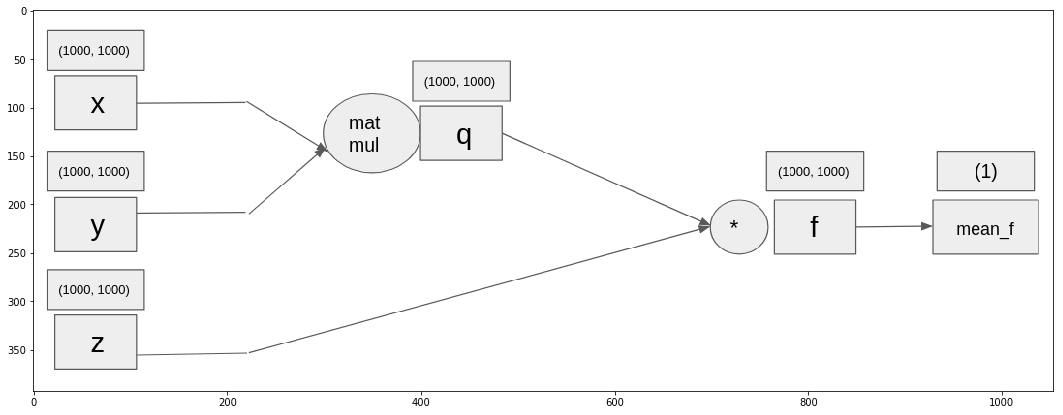

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('graph_exercise.jpg')
fig= plt.figure(figsize=(22,7))
plt.imshow(img)

In [0]:
# Initialize tensors x, y and z
x = torch.rand(1000, 1000)
y = torch.rand(1000, 1000)
z = torch.rand(1000, 1000)

In [0]:
x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)
z = torch.tensor(z, requires_grad=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Multiply tensors x and y
q = torch.matmul(x, y)

# Elementwise multiply tensors z with q
f = z * q

In [0]:
f.shape

torch.Size([1000, 1000])

In [0]:
f

tensor([[149.0784,  84.8117, 152.1335,  ...,   7.8166,   5.0439, 247.5035],
        [ 82.4094, 184.9073, 225.3387,  ..., 231.8065, 115.1259, 112.1869],
        [108.4608, 173.3812, 217.4441,  ..., 178.2883, 170.7666, 134.0112],
        ...,
        [ 12.2782, 125.1086, 121.0574,  ..., 192.4409,   9.7101, 114.5260],
        [ 71.3982,  88.3242, 100.2048,  ..., 183.2586, 137.4587, 109.7916],
        [ 62.8961,  42.2820, 169.9029,  ..., 118.6325, 195.8988,  79.0780]],
       grad_fn=<MulBackward0>)

In [0]:
mean_f = torch.mean(f)

In [0]:
# Calculate the gradients
mean_f.backward()

In [0]:
# Print the gradients
print("Gradient of x is: " + str(x.grad))
print("Gradient of y is: " + str(y.grad))
print("Gradient of z is: " + str(z.grad))

Gradient of x is: tensor([[0.0002, 0.0003, 0.0003,  ..., 0.0002, 0.0002, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0002, 0.0002, 0.0002],
        [0.0002, 0.0002, 0.0002,  ..., 0.0002, 0.0002, 0.0002],
        ...,
        [0.0002, 0.0003, 0.0003,  ..., 0.0002, 0.0002, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0002, 0.0002, 0.0003],
        [0.0002, 0.0003, 0.0003,  ..., 0.0003, 0.0002, 0.0003]])
Gradient of y is: tensor([[0.0002, 0.0002, 0.0002,  ..., 0.0002, 0.0002, 0.0002],
        [0.0003, 0.0002, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0003,  ..., 0.0002, 0.0002, 0.0002],
        ...,
        [0.0003, 0.0002, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0003, 0.0003,  ..., 0.0003, 0.0002, 0.0003]])
Gradient of z is: tensor([[0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0002],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0002],
        [0.0003, 0.000

#### Your first neural network

You are going to build a neural network in PyTorch, using the hard way. 

Your input will be images of size (28, 28), so images containing 784 pixels. Your network will contain an input_layer (provided for you), a hidden layer with 200 units, and an output layer with 10 classes. The input layer has already been created for you. You are going to create the weights, and then do matrix multiplications, getting the results from the network.

In [0]:
#@title
img_array = np.array([2.3724e-01, 1.4770e-01, 9.4633e-01, 5.9913e-01, 7.9114e-01, 2.0509e-01,
        9.4884e-01, 1.5321e-01, 5.8574e-01, 4.5393e-01, 7.2055e-01, 8.4271e-01,
        9.7308e-01, 7.1918e-01, 3.2856e-01, 9.8791e-01, 3.5075e-02, 6.5724e-01,
        4.3213e-01, 4.0566e-01, 4.9717e-01, 6.8740e-01, 7.3487e-01, 8.5874e-01,
        3.7443e-01, 6.1683e-03, 4.9200e-01, 9.6842e-01, 7.8061e-02, 7.5148e-01,
        2.3117e-02, 2.9467e-01, 5.1479e-01, 6.7207e-01, 3.3068e-01, 3.8142e-01,
        7.3800e-01, 7.3000e-01, 9.7059e-01, 5.3934e-01, 7.8244e-01, 9.4580e-01,
        3.4351e-01, 6.4670e-01, 1.0747e-01, 4.6749e-01, 3.2664e-01, 9.4291e-01,
        6.0223e-03, 3.3272e-01, 7.7137e-01, 5.5983e-01, 1.0402e-01, 6.7582e-01,
        4.9654e-01, 7.7787e-01, 8.9347e-01, 6.8888e-01, 3.4319e-01, 5.2113e-02,
        3.6936e-02, 2.6586e-01, 9.1098e-01, 3.7519e-01, 8.8066e-01, 2.4192e-01,
        3.7132e-01, 2.4507e-01, 7.8803e-01, 9.9801e-01, 4.2478e-01, 9.3984e-01,
        3.9290e-01, 8.6244e-01, 8.8710e-01, 4.3006e-01, 5.2000e-01, 8.8786e-01,
        7.4848e-01, 8.7808e-01, 3.1531e-01, 8.2794e-02, 9.5705e-01, 9.2339e-02,
        7.5539e-02, 1.2431e-01, 9.1905e-01, 2.2074e-01, 3.5824e-01, 8.0331e-01,
        1.4409e-01, 8.7038e-01, 7.6044e-01, 7.4126e-01, 6.6995e-01, 8.6907e-01,
        9.6021e-01, 5.8433e-01, 9.5844e-02, 3.8889e-01, 9.1108e-01, 2.0507e-01,
        7.0562e-01, 8.2354e-01, 8.1960e-01, 7.4310e-01, 7.7615e-01, 8.7824e-01,
        6.4083e-01, 3.3223e-01, 2.1655e-01, 4.8378e-01, 4.8657e-01, 4.6264e-01,
        8.1059e-01, 8.8849e-01, 2.0165e-01, 8.5700e-01, 2.8150e-01, 8.1875e-01,
        8.4736e-01, 2.8991e-01, 8.1055e-02, 8.5346e-01, 7.9911e-01, 1.6616e-01,
        6.0888e-01, 4.6885e-01, 3.6213e-01, 9.7196e-01, 9.7937e-01, 9.8391e-01,
        8.4028e-01, 7.4130e-01, 8.7799e-01, 5.1741e-01, 8.3300e-01, 9.6276e-02,
        3.5411e-01, 4.8981e-02, 5.1242e-01, 3.4657e-01, 8.7887e-01, 5.9535e-01,
        3.4434e-01, 7.7475e-01, 3.5143e-01, 5.4946e-01, 3.6114e-01, 3.6109e-01,
        2.2645e-01, 8.2404e-03, 6.3480e-01, 6.0169e-01, 8.7994e-01, 7.5001e-01,
        2.1072e-01, 3.1500e-01, 3.2845e-02, 6.4618e-01, 3.7673e-01, 6.1086e-01,
        5.0714e-01, 7.0715e-01, 8.9627e-01, 1.9484e-01, 9.9435e-01, 2.0937e-01,
        1.3058e-01, 2.4210e-01, 1.8455e-01, 9.0511e-01, 8.1683e-01, 5.9009e-01,
        1.2267e-01, 5.8672e-02, 6.3181e-01, 5.8431e-01, 2.3371e-01, 8.0981e-01,
        9.6498e-02, 8.0928e-01, 9.6120e-01, 8.8547e-01, 8.5012e-02, 3.2141e-03,
        6.7754e-01, 6.6624e-01, 1.6389e-01, 1.0736e-01, 3.9179e-02, 5.3540e-01,
        2.2366e-01, 6.7618e-01, 2.5325e-01, 6.3739e-02, 3.5542e-01, 4.2928e-01,
        5.8071e-01, 1.9603e-02, 3.1817e-01, 6.1676e-01, 7.8709e-01, 9.1727e-01,
        1.4555e-02, 7.5705e-01, 3.8946e-01, 1.6807e-01, 1.7450e-01, 3.6377e-01,
        7.1463e-01, 3.9060e-01, 5.8005e-01, 7.6825e-01, 8.5434e-01, 9.3213e-01,
        6.0608e-01, 6.0338e-01, 2.2467e-02, 3.9416e-01, 3.9373e-01, 3.7278e-01,
        5.2935e-02, 8.0387e-01, 9.8925e-01, 3.8579e-01, 1.5227e-01, 8.1651e-01,
        9.7350e-02, 3.8463e-01, 3.2158e-01, 1.3969e-01, 8.7217e-01, 4.9525e-01,
        1.7164e-02, 6.4930e-01, 1.1340e-01, 2.0706e-01, 5.5634e-01, 7.2511e-02,
        6.4048e-01, 6.7762e-01, 6.6725e-02, 6.9711e-01, 4.2800e-01, 3.4196e-01,
        8.5903e-01, 6.6064e-01, 1.7385e-01, 1.1499e-01, 7.7402e-01, 4.5377e-01,
        4.9542e-01, 8.4668e-01, 2.3112e-01, 3.3380e-01, 3.7303e-01, 8.8370e-01,
        5.4995e-01, 1.6462e-01, 6.0657e-01, 8.5006e-01, 8.8105e-02, 6.9832e-01,
        9.8796e-01, 2.5369e-01, 9.8546e-01, 8.2475e-01, 4.2071e-01, 1.2559e-01,
        4.0652e-01, 4.4281e-01, 9.3686e-02, 6.6566e-01, 8.1331e-01, 2.4681e-02,
        2.0552e-01, 6.6495e-02, 8.0389e-01, 5.4382e-01, 5.1603e-01, 7.0097e-01,
        3.5470e-01, 6.5184e-01, 5.7980e-01, 5.0869e-01, 5.3929e-01, 5.3691e-01,
        5.5815e-01, 5.8193e-01, 3.8887e-02, 3.0158e-01, 1.4569e-01, 8.2892e-01,
        7.9534e-01, 2.9739e-01, 3.0350e-01, 9.0634e-01, 7.2640e-01, 2.8021e-01,
        7.5161e-01, 9.7908e-01, 9.0202e-01, 8.1180e-01, 3.4690e-01, 6.4488e-01,
        1.7827e-01, 4.1981e-01, 8.7535e-01, 6.4990e-01, 3.6724e-01, 4.2822e-01,
        6.3209e-01, 4.4759e-01, 8.7070e-01, 3.9987e-01, 6.1549e-01, 5.7689e-01,
        9.6371e-01, 9.0362e-01, 5.2627e-02, 3.3208e-01, 5.0954e-01, 1.8921e-01,
        7.1357e-01, 9.5721e-01, 9.6798e-02, 1.5915e-01, 7.7432e-01, 9.7892e-01,
        8.6211e-01, 9.3616e-01, 2.2948e-01, 2.0240e-01, 9.3685e-01, 2.4765e-01,
        8.4450e-02, 1.6506e-01, 4.3930e-01, 9.4344e-01, 7.2502e-01, 5.0390e-01,
        3.9310e-01, 9.8981e-01, 6.2044e-01, 6.0934e-02, 8.5253e-01, 1.2783e-01,
        1.5224e-01, 1.2027e-01, 7.6306e-01, 5.6149e-01, 8.1043e-01, 5.6918e-01,
        3.8852e-01, 9.5483e-01, 9.5564e-01, 1.8515e-01, 7.5287e-01, 5.7578e-01,
        1.5747e-01, 8.5043e-01, 6.7922e-01, 7.8632e-01, 4.9284e-01, 5.9167e-01,
        6.0164e-01, 6.3161e-01, 3.7798e-02, 2.2049e-01, 6.3279e-01, 3.9742e-01,
        4.2930e-02, 3.5893e-01, 5.6869e-01, 6.9231e-01, 6.7845e-01, 2.1985e-01,
        2.9189e-01, 2.0189e-02, 7.5675e-01, 1.6024e-01, 2.0737e-01, 4.1504e-01,
        7.9706e-01, 1.8087e-01, 7.5905e-01, 9.2254e-02, 5.6026e-01, 5.9962e-01,
        2.6792e-01, 3.6235e-01, 6.5448e-01, 3.5372e-01, 8.6413e-01, 5.0548e-01,
        8.6727e-01, 9.6190e-01, 6.7583e-01, 7.8140e-01, 6.8066e-01, 7.7573e-01,
        9.2876e-01, 5.1811e-01, 3.5109e-01, 1.3143e-01, 1.2202e-01, 9.4147e-01,
        7.3284e-01, 1.3184e-01, 1.2450e-01, 7.9276e-01, 8.8658e-01, 2.4381e-03,
        8.8915e-01, 8.0726e-01, 2.6991e-01, 5.4288e-01, 4.1934e-01, 8.7513e-01,
        1.8332e-01, 2.8444e-01, 6.5752e-01, 5.5481e-01, 3.8812e-01, 3.7753e-01,
        7.8160e-01, 4.0657e-01, 1.8811e-01, 9.0368e-01, 7.7273e-02, 4.7769e-02,
        5.0172e-01, 4.6590e-01, 5.9053e-01, 3.4034e-03, 3.2366e-01, 6.9001e-01,
        7.2887e-01, 2.5722e-01, 3.4530e-02, 7.7275e-01, 6.5089e-01, 7.0905e-01,
        3.8474e-01, 4.2262e-01, 1.9860e-04, 6.6855e-02, 8.4551e-01, 5.5525e-01,
        1.4115e-01, 8.6193e-01, 8.2664e-01, 6.6046e-01, 9.5780e-01, 3.4315e-01,
        5.5485e-01, 8.2462e-01, 3.3053e-01, 4.5080e-01, 5.2312e-01, 5.1423e-01,
        9.4745e-01, 8.9463e-01, 5.0723e-01, 7.5445e-01, 6.5771e-01, 2.3145e-01,
        9.8636e-01, 3.8018e-01, 5.4245e-01, 3.0195e-01, 5.6755e-01, 6.0850e-02,
        2.8620e-01, 1.6233e-01, 2.9880e-01, 2.0094e-01, 8.0097e-01, 7.9751e-02,
        5.7563e-01, 9.6281e-01, 2.1973e-01, 3.4798e-01, 3.5041e-01, 8.8032e-01,
        2.0771e-02, 1.9036e-01, 5.5665e-01, 3.7614e-01, 5.5070e-02, 8.8275e-02,
        6.9279e-01, 1.4775e-01, 5.5471e-02, 8.9747e-01, 5.7401e-01, 8.5697e-01,
        7.5529e-01, 2.7880e-01, 7.8041e-01, 3.3526e-01, 2.8504e-01, 8.5281e-01,
        6.3302e-01, 1.5490e-01, 6.9054e-01, 9.9270e-01, 2.0685e-01, 7.6879e-02,
        2.9740e-01, 1.7238e-01, 6.7283e-02, 7.6615e-01, 7.2203e-01, 9.9305e-01,
        1.5253e-01, 9.6002e-01, 5.1949e-01, 9.1445e-01, 8.5448e-01, 9.7888e-01,
        7.9790e-01, 8.6030e-02, 3.5675e-01, 3.7644e-02, 4.6548e-01, 3.4021e-01,
        7.4609e-01, 2.5477e-01, 7.6476e-01, 7.9340e-01, 3.7418e-01, 2.1924e-01,
        7.3306e-02, 9.4267e-01, 1.6849e-01, 5.4148e-01, 4.3301e-01, 8.1756e-01,
        4.1775e-01, 7.8919e-01, 1.2363e-01, 1.3179e-01, 4.9734e-01, 7.7710e-03,
        1.1954e-01, 3.6819e-01, 6.0851e-01, 6.7749e-01, 3.7932e-02, 1.5105e-01,
        6.0832e-01, 9.8761e-01, 3.3434e-01, 6.4316e-01, 3.8755e-01, 2.2258e-01,
        3.7032e-01, 6.3609e-01, 4.8332e-01, 6.4974e-01, 7.2850e-01, 9.6285e-01,
        2.9878e-01, 9.0763e-01, 6.4237e-01, 9.2751e-01, 5.1827e-01, 8.2179e-01,
        9.9679e-01, 3.7922e-01, 2.4564e-01, 6.5503e-01, 8.9666e-01, 9.6696e-01,
        9.8057e-01, 3.7759e-01, 3.9893e-01, 4.4567e-02, 7.3399e-01, 2.2141e-01,
        7.5470e-01, 2.4858e-01, 2.4601e-01, 5.7235e-01, 2.4587e-01, 7.1578e-01,
        2.8405e-01, 3.1498e-01, 8.0454e-01, 9.8453e-01, 8.9966e-01, 5.4507e-01,
        1.2292e-01, 8.0998e-01, 9.3947e-01, 7.6147e-01, 3.1570e-01, 8.8410e-01,
        7.2921e-01, 3.7852e-02, 2.8733e-01, 6.9159e-01, 3.1358e-01, 2.9579e-01,
        9.5903e-01, 1.7718e-01, 8.3692e-01, 7.6839e-01, 3.4917e-02, 2.0404e-01,
        3.6914e-01, 1.8892e-01, 2.4165e-01, 3.5836e-01, 9.3162e-01, 9.0036e-01,
        1.4453e-02, 3.3924e-01, 5.5492e-01, 8.4730e-01, 5.2058e-01, 2.7124e-01,
        8.9461e-01, 1.8854e-01, 1.8642e-01, 9.6216e-01, 1.2640e-01, 2.7733e-01,
        6.2279e-02, 5.0317e-01, 3.2577e-01, 3.1230e-01, 4.3280e-01, 9.6483e-02,
        3.4168e-01, 5.0785e-01, 1.6125e-01, 8.1831e-01, 8.0078e-02, 7.9415e-01,
        8.1292e-01, 1.8845e-02, 5.3261e-01, 4.0248e-01, 6.4988e-01, 2.6750e-01,
        5.2412e-02, 7.1768e-01, 1.9946e-01, 9.5239e-01, 4.9453e-02, 4.1518e-01,
        2.8973e-01, 4.9929e-01, 3.8232e-02, 1.9295e-01, 3.3373e-02, 4.3522e-01,
        4.0560e-01, 1.2313e-02, 4.5811e-01, 9.2323e-02, 8.8906e-01, 2.6760e-01,
        7.7540e-01, 4.0725e-01, 2.3308e-02, 2.8106e-01, 4.6548e-01, 4.6179e-01,
        2.7186e-01, 2.2488e-01, 5.3311e-01, 1.1883e-02, 2.6157e-01, 8.0629e-02,
        9.8333e-01, 6.9672e-01, 8.7642e-01, 4.0015e-01, 5.3061e-01, 1.7805e-01,
        6.0877e-02, 1.3294e-01, 4.8395e-02, 7.3392e-01, 1.6784e-01, 5.6932e-01,
        2.0333e-02, 7.7933e-02, 7.6761e-01, 8.4312e-01, 7.1655e-01, 3.1280e-01,
        9.7956e-01, 5.7333e-01, 5.6644e-01, 7.2989e-01, 8.6287e-01, 4.4757e-01,
        7.2773e-01, 8.4289e-01, 5.9126e-01, 4.7260e-01, 7.6854e-01, 1.4134e-01,
        2.7429e-01, 1.2493e-01, 2.6724e-01, 3.0154e-01, 7.2876e-01, 5.9397e-01,
        9.3481e-01, 1.5858e-01, 5.4167e-01, 8.9403e-01, 7.3171e-01, 5.4670e-01,
        4.2445e-01, 2.2964e-01, 5.8586e-01, 8.5128e-01, 8.8449e-01, 5.0989e-01,
        9.7068e-01, 3.7438e-01, 1.9639e-01, 8.8476e-01, 1.1019e-01, 5.2788e-01,
        7.0362e-01, 7.6070e-01, 3.4672e-01, 4.3055e-01, 7.7780e-01, 4.9716e-02,
        3.6777e-02, 3.1747e-01, 4.9999e-01, 4.7978e-01, 3.6298e-01, 7.9606e-02,
        5.9340e-01, 7.6075e-01, 5.7393e-01, 5.2308e-01, 7.9828e-01, 9.0217e-01,
        1.9948e-01, 9.8751e-01, 4.2071e-01, 9.9315e-01, 5.4121e-01, 3.4165e-01,
        2.2169e-01, 3.7098e-01, 1.8132e-01, 1.0010e-01, 6.3798e-01, 1.9958e-01,
        1.4028e-02, 8.9475e-01, 3.1722e-01, 7.1885e-01, 4.5621e-01, 5.9885e-01,
        7.7042e-01, 7.3224e-04, 3.5103e-01, 5.7697e-01, 1.4455e-01, 3.9167e-01,
        5.1116e-02, 3.5322e-01, 2.8093e-01, 8.7040e-01, 6.3166e-01, 8.3349e-01,
        6.6931e-01, 8.8223e-01, 5.9358e-01, 5.1434e-01])

In [0]:
img_array = np.float32(img_array)
input_layer = torch.tensor(img_array, requires_grad=True)

In [0]:
input_layer.shape

torch.Size([784])

In [0]:
input_layer.dtype

torch.float32

In [0]:
# Initialize the weights of the neural network
weight_1 = torch.rand(784, 200)
weight_2 = torch.rand(200, 10)

In [0]:
weight_1.shape

torch.Size([784, 200])

In [0]:
weight_1.dtype

torch.float32

In [0]:
weight_2.shape

torch.Size([200, 10])

In [0]:
# Multiply input_layer with weight_1
hidden_1 = torch.matmul(input_layer, weight_1)

# Multiply hidden_1 with weight_2
output_layer = torch.matmul(hidden_1, weight_2)
print(output_layer)

tensor([18736.5527, 19699.8223, 19048.2070, 20263.3672, 18331.7051, 19965.0293,
        20783.1660, 19988.4512, 19361.2402, 19590.8848],
       grad_fn=<SqueezeBackward3>)


**Observation:**

For the most part, neural networks are just matrix (tensor) multiplication. This is the reason why we have put so much emphasis on matrices and tensors!

#### Your first PyTorch neural network

You are going to build the same neural network you built in the previous exercise, but now using the PyTorch way. As a reminder, you have 784 units in the input layer, 200 hidden units and 10 units for the output layer.

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate all 2 linear layers  
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
      
        # Use the instantiated layers and return x
        x = self.fc1(x)
        x = self.fc2(x)
        return x

## 2. Artificial Neural Networks

In this second chapter, we delve deeper into Artificial Neural Networks, learning how to train them with real datasets.

###Activation functions


#### Neural networks

Let us see the differences between neural networks which apply ReLU and those which do not apply ReLU. We have already initialized the input called input_layer, and three sets of weights, called weight_1, weight_2 and weight_3.

We are going to convince ourselves that networks with multiple layers which do not contain non-linearity can be expressed as neural networks with one layer.

The network and the shape of layers and weights is shown below.

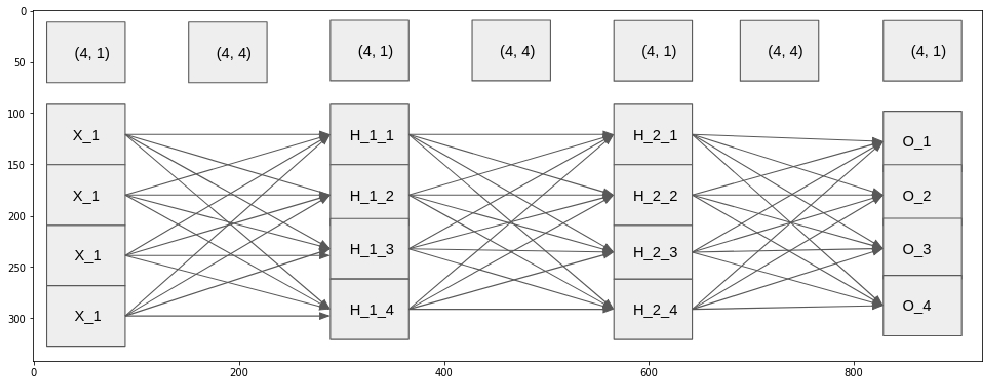

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('net-ex.jpg')
fig= plt.figure(figsize=(17,7))
plt.imshow(img)

In [0]:
weight_1 = np.array([[-0.1094, -0.8285,  0.0416, -1.1222],
        [ 0.3327, -0.0461,  1.4473, -0.8070],
        [ 0.0681, -0.7058, -1.8017,  0.5857],
        [ 0.8764,  0.9618, -0.4505,  0.2888]])
    
weight_2 = np.array([[ 0.6856, -1.7650,  1.6375, -1.5759],
        [-0.1092, -0.1620,  0.1951, -0.1169],
        [-0.5120,  1.1997,  0.8483, -0.2476],
        [-0.3369,  0.5617, -0.6658,  0.2221]])

weight_3 = np.array([[ 0.8824,  0.1268,  1.1951,  1.3061],
        [-0.8753, -0.3277, -0.1454, -0.0167],
        [ 0.3582,  0.3254, -1.8509, -1.4205],
        [ 0.3786,  0.5999, -0.5665, -0.3975]])

input_layer = np.array([[ 0.0401, -0.9005,  0.0397, -0.0876]])

In [0]:
# [can skip] convert to float32
weight_1 = np.float32(weight_1)
weight_2 = np.float32(weight_2)
weight_3 = np.float32(weight_3)
input_layer = np.float32(input_layer)

In [0]:
weight_1 = torch.tensor(weight_1, requires_grad=True)
weight_2 = torch.tensor(weight_2, requires_grad=True)
weight_3 = torch.tensor(weight_3, requires_grad=True)
input_layer = torch.tensor(input_layer, requires_grad=True)

In [0]:
weight_1

tensor([[-0.1094, -0.8285,  0.0416, -1.1222],
        [ 0.3327, -0.0461,  1.4473, -0.8070],
        [ 0.0681, -0.7058, -1.8017,  0.5857],
        [ 0.8764,  0.9618, -0.4505,  0.2888]], requires_grad=True)

In [0]:
# Calculate the first and second hidden layer
hidden_1 = torch.matmul(input_layer, weight_1)
hidden_2 = torch.matmul(hidden_1, weight_2)

# Calculate the output
print(torch.matmul(hidden_2, weight_3))

tensor([[0.2653, 0.1311, 3.8219, 3.0032]], grad_fn=<MmBackward>)


In [0]:
# Calculate weight_composed_1 and weight
weight_composed_1 = torch.matmul(weight_1, weight_2)
weight = torch.matmul(weight_composed_1, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

tensor([[0.2653, 0.1311, 3.8219, 3.0032]], grad_fn=<MmBackward>)


**Observation:**

You see how the results are the same.

#### ReLU activation

In this exercise, we have the same settings as the previous exercise. In addition, we have instantiated the ReLU activation function called relu().

Now we are going to build a neural network which has non-linearity and by doing so, we are going to convince ourselves that networks with multiple layers and non-linearity functions cannot be expressed as a neural network with one layer.

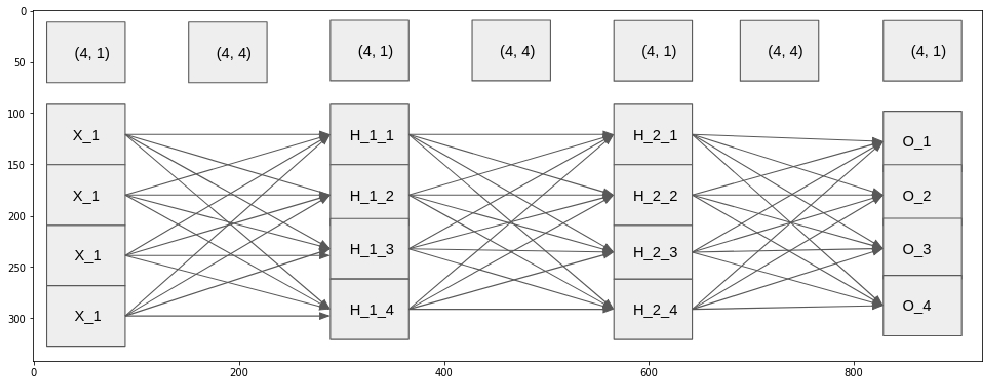

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('net-ex.jpg')
fig= plt.figure(figsize=(17,7))
plt.imshow(img)

In [0]:
from torch.nn import ReLU as relu 

In [0]:
relu??

In [0]:
input_layer.shape

torch.Size([1, 4])

In [0]:
# Apply non-linearity on hidden_1 and hidden_2
hidden_1_activated = relu(torch.matmul(input_layer, weight_1))
hidden_2_activated = relu(torch.matmul(hidden_1_activated, weight_2))
print(torch.matmul(hidden_2_activated, weight_3))

TypeError: ignored

In [0]:
# Apply non-linearity in the product of first two weights. 
weight_composed_1_activated = relu(torch.matmul(weight_1, weight_2))

# Multiply `weight_composed_1_activated` with `weight_3
weight = torch.matmul(weight_composed_1_activated, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

In [0]:
# Instantiate ReLU activation function as relu
relu = nn.ReLU()

# Initialize weight_1 and weight_2 with random numbers
weight_1 = torch.rand(4, 6)
weight_2 = torch.rand(6, 2)

# Multiply input_layer with weight_1
hidden_1 = torch.matmul(input_layer, weight_1)

# Apply ReLU activation function over hidden_1 and multiply with weight_2
hidden_1_activated = relu(hidden_1)
print(torch.matmul(hidden_1_activated, weight_2))

###Loss functions


####Calculating loss function in PyTorch


In [4]:
# Initialize the scores and ground truth
logits = torch.tensor([[-1.2, 0.12, 4.8]])
ground_truth = torch.tensor([2])

# Instantiate cross entropy loss
criterion = nn.CrossEntropyLoss()

# Compute and print the loss
loss = criterion(logits, ground_truth)
print(loss)

tensor(0.0117)


####Loss function of random scores

The neural network is going to have 1000 classes, each having a random score. For ground truth, it will have class 111. 

Calculate the loss function.

In [5]:
# Import torch and torch.nn
import torch
import torch.nn as nn

# Initialize logits and ground truth
logits = torch.rand(1, 1000)
ground_truth = torch.tensor([111])

# Instantiate cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Calculate and print the loss
loss = criterion(logits, ground_truth)
print(loss)

tensor(6.4754)


###Preparing a dataset in PyTorch


####Preparing MNIST dataset

You are going to prepare dataloaders for MNIST training and testing set.

In [0]:
from torchvision import transforms

In [8]:
# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((0.1307), ((0.3081)))])

# Prepare the datasets
trainset = torchvision.datasets.MNIST('mnist', train=True, 
									  download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False, 
									  download=True, transform=transform)

# Prepare the dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
										  shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
										 shuffle=False, num_workers=0)       

0it [00:00, ?it/s]

9920512it [00:02, 3865453.85it/s]                             


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 57599.44it/s]                           
0it [00:00, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw


1654784it [00:01, 956754.33it/s]                             
0it [00:00, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw


8192it [00:00, 22055.91it/s]            

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw
Processing...
Done!


####Inspecting the dataloaders

In [10]:
# Compute the shape of the training set and testing set
trainset_shape = trainloader.dataset.train_data.shape
testset_shape = testloader.dataset.test_data.shape

# Print the computed shapes
print(trainset_shape, testset_shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [11]:
# Compute the size of the minibatch for training set and testing set
trainset_batchsize = trainloader.batch_size
testset_batchsize = testloader.batch_size

# Print sizes of the minibatch
print(trainset_batchsize, testset_batchsize)

32 32


####Training neural networks


In [0]:
# Define the class Net
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):    
    	# Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [16]:
model = Net()
model

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

Given the fully connected neural network (called `model`) which you built in the previous exercise and a train loader called `train_loader` containing the MNIST dataset (which we created for you), you're to train the net in order to predict the classes of digits.

In [0]:
# train_loader: 50*2*128*1*28*28

In [0]:
from torch import optim

In [17]:
# Instantiate the Adam optimizer and Cross-Entropy loss function
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

for batch_idx, data_target in enumerate(train_loader):
    data = data_target[0]
    target = data_target[1]
    data = data.view(-1, 28 * 28)
    optimizer.zero_grad()

    # Complete a forward pass
    output = model(data)

    # Compute the loss, gradients and change the weights
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

NameError: ignored

In [0]:
# Set the model in eval mode
model.eval()

for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1, 28 * 28)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

## 3. Convolutional Neural Networks (CNNs)

In this third chapter, we introduce convolutional neural networks, learning how to train them and how to use them to make predictions.

###Convolution operator


####Convolution operator - OOP way
Let's kick off this chapter by using convolution operator from the torch.nn package. 

You are going to create a random tensor which will represent your image and random filters to convolve the image with. Then you'll apply those images.

In [18]:
# Create 10 random images of shape (1, 28, 28)
images = torch.rand(10, 1, 28, 28)

# Build 6 conv. filters
conv_filters = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)

# Convolve the image with the filters
output_feature = conv_filters(images)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])


####Convolution operator - Functional way
While I and most of PyTorch practitioners love the `torch.nn` package (OOP way), other practitioners prefer building neural network models in a more functional way, using `torch.nn.functional`. 

In [0]:
import torch.nn.functional as F

In [21]:
# Create 10 random images
image = torch.rand(10, 1, 28, 28)

# Create 6 filters
filters = torch.rand(6, 1, 3, 3)

# Convolve the image with the filters
output_feature = F.conv2d(image, filters, stride=1, padding=1)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])


####Pooling operators


####Max-pooling operator

In [0]:
weight_im = np.array([[[[ 8.,  1.,  2.,  5.,  3.,  1.],
          [ 6.,  0.,  0., -5.,  7.,  9.],
          [ 1.,  9., -1., -2.,  2.,  6.],
          [ 0.,  4.,  2., -3.,  4.,  3.],
          [ 2., -1.,  4., -1., -2.,  3.],
          [ 2., -4.,  5.,  9., -7.,  8.]]]])

In [24]:
# pre-loaded
im = torch.tensor(weight_im)
im

tensor([[[[ 8.,  1.,  2.,  5.,  3.,  1.],
          [ 6.,  0.,  0., -5.,  7.,  9.],
          [ 1.,  9., -1., -2.,  2.,  6.],
          [ 0.,  4.,  2., -3.,  4.,  3.],
          [ 2., -1.,  4., -1., -2.,  3.],
          [ 2., -4.,  5.,  9., -7.,  8.]]]], dtype=torch.float64)

In [25]:
# Build a pooling operator with size `2`.
max_pooling = torch.nn.MaxPool2d(2)

# Apply the pooling operator
output_feature = max_pooling(im)

# Use pooling operator in the image
output_feature_F = F.max_pool2d(im, 2)

# print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[8., 5., 9.],
          [9., 2., 6.],
          [2., 9., 8.]]]], dtype=torch.float64)
tensor([[[[8., 5., 9.],
          [9., 2., 6.],
          [2., 9., 8.]]]], dtype=torch.float64)


####Average-pooling operator


In [26]:
# pre-loaded
im

tensor([[[[ 8.,  1.,  2.,  5.,  3.,  1.],
          [ 6.,  0.,  0., -5.,  7.,  9.],
          [ 1.,  9., -1., -2.,  2.,  6.],
          [ 0.,  4.,  2., -3.,  4.,  3.],
          [ 2., -1.,  4., -1., -2.,  3.],
          [ 2., -4.,  5.,  9., -7.,  8.]]]], dtype=torch.float64)

In [27]:
# Build a pooling operator with size `2`.
avg_pooling = torch.nn.AvgPool2d(2)

# Apply the pooling operator
output_feature = avg_pooling(im)

# Use pooling operator in the image
output_feature_F = F.avg_pool2d(im, 2)

# print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[ 3.7500,  0.5000,  5.0000],
          [ 3.5000, -1.0000,  3.7500],
          [-0.2500,  4.2500,  0.5000]]]], dtype=torch.float64)
tensor([[[[ 3.7500,  0.5000,  5.0000],
          [ 3.5000, -1.0000,  3.7500],
          [-0.2500,  4.2500,  0.5000]]]], dtype=torch.float64)


###Convolutional Neural Networks


####Your first CNN - __init__ method

You're going to use the MNIST dataset as the dataset, which is made of handwritten digits from 0 to 9. 

The convolutional neural network is going to have 2 convolutional layers, each followed by a ReLU nonlinearity, and a fully connected layer. 

Remember that each pooling layer halves both the height and the width of the image, so by using 2 pooling layers, the height and width are 1/4 of the original sizes.

In [0]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
		
        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(7 * 7 * 10, 10)

    def forward(self, x):
  
        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)

        # Apply the fully connected layer and return the result
        return self.fc(x)

####Your first CNN - forward() method

Now that you have declared all the parameters of your CNN, all you need to do is to implement the net's `forward()` method, and voila, you have your very first PyTorch CNN.

In [0]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
		
        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(7 * 7 * 10, 10)

    def forward(self, x):
  
        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)

        # Apply the fully connected layer and return the result
        return self.fc(x)

###Training Convolutional Neural Networks


####Training CNNs

In [0]:
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    # Compute the forward pass
    outputs = net(inputs)
        
    # Compute the loss function
    loss = criterion(outputs, labels)
        
    # Compute the gradients
    loss.backward()
        
    # Update the weights
    optimizer.step()

####Using CNNs to make predictions


In [0]:
# Iterate over the data in the test_loader
for data in test_loader:

    # Get the image and label from data
    image, label = data

    # Make a forward pass in the net with your image
    output = net(image)

    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)
    if predicted == label:
        print("Yipes, your net made the right prediction " + str(predicted))
    else:
        print("Your net prediction was " + str(predicted) + ", but the correct label is: " + str(label))

## 4. Using Convolutional Neural Networks

In this last chapter, we learn how to make neural networks work well in practice, using concepts like regularization, batch-normalization and transfer learning.

###The sequential module


####Sequential module - init method

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1), 
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1), 
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True))
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(nn.Linear(7 * 7 * 40, 1024), nn.ReLU(inplace=True),
                                       	nn.Linear(1024, 2048), nn.ReLU(inplace=True),
                                        nn.Linear(2048, 10))

####Sequential module - forward() method

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1), 
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1), 
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True))
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(nn.Linear(7 * 7 * 40, 1024), nn.ReLU(inplace=True),
                                       	nn.Linear(1024, 2048), nn.ReLU(inplace=True),
                                        nn.Linear(2048, 10))
        
    def forward(self, x):
      
        # Apply the feature extractor in the input
        x = self.features(x)
        
        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7 * 7 * 40)
        
        # Classify the images
        x = self.classifier(x)
        return x

###The problem of overfitting


####Validation set


In [0]:
# Shuffle the indices
indices = np.arange(60000)
np.random.shuffle(indices)

# Build the train loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('mnist', download=True, train=True,
                     transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
                     batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:55000]))

# Build the validation loader
val_loader = torch.utils.data.DataLoader(datasets.MNIST('mnist', download=True, train=True,
                   transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
                   batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[55000:]))

###Regularization techniques


####L2-regularization

In [0]:
# Instantiate the network
model = Net()

# Instantiate the cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Instantiate the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.001)

####Dropout


In [0]:
class Net(nn.Module):
    def __init__(self):
        
        # Define all the parameters of the net
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(200, 500),
            nn.ReLU(inplace=True),
            nn.Linear(500, 10))
        
    def forward(self, x):
    
    	# Do the forward pass
        return self.classifier(x)

###Batch-normalization


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Implement the sequential module for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(10),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(20))
        
        # Implement the fully connected layer for classification
        self.fc = nn.Linear(in_features=7*7*20, out_features=10)

###Transfer learning


####Finetuning a CNN


In [0]:
# Create a new model
model = Net()

# Change the number of output units
model.fc = nn.Linear(7 * 7 * 512, 26)

# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))

- Repeat the training process, but first load the digit classifier parameters from `my_net.pth`.

In [0]:
# Create a new model
model = Net()

# Load the parameters from the old model
model.load_state_dict(torch.load('my_net.pth'))

# Change the number of out channels
model.fc = nn.Linear(7 * 7 * 512, 26)

# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))

####Torchvision module


In [0]:
# Import the module
import torchvision

# Download resnet18
model = torchvision.models.resnet18(pretrained=True)

# Freeze all the layers bar the last one
for param in model.parameters():
    param.requires_grad = False

# Change the number of output units
model.fc = nn.Linear(512, 7)